In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# Convert MNIST Image Files into a tensor of 4-Dimension (# of images, Height, Width, Color chanel)
transform = transforms.ToTensor()

In [4]:
# Train data
train_data = datasets.MNIST(root= '/cnn_data', train=True, download=True, transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15956658.21it/s]


Extracting /cnn_data/MNIST/raw/train-images-idx3-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 491038.23it/s]


Extracting /cnn_data/MNIST/raw/train-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4395141.50it/s]


Extracting /cnn_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5691822.16it/s]

Extracting /cnn_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw



In [5]:
# Test data
test_data = datasets.MNIST(root= '/cnn_data', train=False, download=True, transform=transform)

In [6]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [7]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [8]:
ls

sample_data/


In [9]:
pwd

'/content'

In [10]:
cd ..

/


In [11]:
pwd

'/'

In [12]:
ls

bin@       cuda-keyring_1.0-1_all.deb  home/    lib64@   NGC-DL-CONTAINER-LICENSE  run/   tmp/
boot/      datalab/                    kaggle/  libx32@  opt/                      sbin@  tools/
cnn_data/  dev/                        lib@     media/   proc/                     srv/   usr/
content/   etc/                        lib32@   mnt/     root/                     sys/   var/


In [13]:
cd cnn_data/

/cnn_data


In [14]:
pwd

'/cnn_data'

In [15]:
ls

MNIST/


In [16]:
cd MNIST/

/cnn_data/MNIST


In [17]:
ls

raw/


In [18]:
cd raw/

/cnn_data/MNIST/raw


In [19]:
ls

t10k-images-idx3-ubyte     t10k-labels-idx1-ubyte.gz   train-labels-idx1-ubyte
t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte     train-labels-idx1-ubyte.gz
t10k-labels-idx1-ubyte     train-images-idx3-ubyte.gz


In [20]:
cd /content

/content


In [21]:
pwd

'/content'

In [22]:
ls

sample_data/


In [23]:
# Create a small batch of images 10
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [24]:
# Define CNN Model 2layers
conv1 = nn.Conv2d(1, 6, 3, 1)
conv2 = nn.Conv2d(6, 16, 3, 1)

In [25]:
# Grab 1 MNIST Image
for i, (X_Train, y_Train) in enumerate(train_data):
  break

In [26]:
X_Train.shape

torch.Size([1, 28, 28])

In [27]:
x = X_Train

In [28]:
# Perform first convolution
x = F.relu(conv1(x)) # Rectified Linear Unit for activation function

In [29]:
# 1 single image, 6 is filters/feature maps, 26*26
x.shape

torch.Size([6, 26, 26])

In [30]:
# pass through the pooling layer
x = F.max_pool2d(x,2,2) # kernal of 2, stride of 2

In [31]:
x.shape # 26/2=13

torch.Size([6, 13, 13])

In [32]:
# Do second convolutioanl layer
x = F.relu(conv2(x))

In [33]:
x.shape

torch.Size([16, 11, 11])

In [34]:
# pooling layer
x = F.max_pool2d(x,2,2)

In [35]:
x.shape #11/2=5.5 round down to 5, because you cannot invent data to round up

torch.Size([16, 5, 5])

In [36]:
# Model Class
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)
    # Fully connected layer
    self.fc1 = nn.Linear(5*5*16,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2) # 2*2 kernal and stride 2
    # Second Pass
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2) # 2*2 kernal and stride 2

    # Re_View to flatten it out
    X = X.view(-1, 16*5*5) # Negative one so that we can vary the batch size

    # Fully Connected Layers
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X, dim=1)


In [37]:
# Create an Instance of our Model
torch.manual_seed(68)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [38]:
# Loss Function Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # Smaller learning rate, spending more time to train!


In [39]:
import time
start_time = time.time()

# Create Variables To Track Things
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# For Loop of Epochs
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  # Train
  for b,(X_train, Y_train) in enumerate(train_loader):
    b+=1   # start out batches at 1
    Y_pred = model(X_train) # Get predicted values form the training set. Not flattend 2D
    loss = criterion(Y_pred, Y_train) # How off are the Model. Compare the predictions to correct answers in Y_train

    predicted = torch.max(Y_pred.data, 1)[1] # add up the number of correct predictions. Indexed off the first point.
    batch_corr = (predicted == Y_train).sum() # How many we get correct from batch. True = 1, Falsr = 0, sun those up
    trn_corr += batch_corr # Keeo track as we go along in training.

    # Update our parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print out some results
    if b%600 ==0:
      print(f'Epochs: {i} Batch: {b} Loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)

  # Test
  with torch.no_grad(): # No gradient do not upfate weights and biases with test set
   for b,(X_test, Y_test) in enumerate(test_loader):
    Y_val = model(X_test)
    predicted = torch.max(Y_val.data, 1)[1] # addign up correct predictions
    tst_corr += (predicted == Y_test).sum()  # T=1 F=0 and sum away

  loss = criterion(Y_val, Y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)

current_time = time.time()
total = current_time - start_time
print(f'Training Took: {total/60} minutes!')


Epochs: 0 Batch: 600 Loss: 0.17682988941669464
Epochs: 0 Batch: 1200 Loss: 0.18436872959136963
Epochs: 0 Batch: 1800 Loss: 0.3749023973941803
Epochs: 0 Batch: 2400 Loss: 0.5074084401130676
Epochs: 0 Batch: 3000 Loss: 0.032824285328388214
Epochs: 0 Batch: 3600 Loss: 0.22680477797985077
Epochs: 0 Batch: 4200 Loss: 0.020403796806931496
Epochs: 0 Batch: 4800 Loss: 0.006631325930356979
Epochs: 0 Batch: 5400 Loss: 0.0018949664663523436
Epochs: 0 Batch: 6000 Loss: 0.008881835266947746
Epochs: 1 Batch: 600 Loss: 0.005394080653786659
Epochs: 1 Batch: 1200 Loss: 0.0028350783977657557
Epochs: 1 Batch: 1800 Loss: 0.02368948422372341
Epochs: 1 Batch: 2400 Loss: 0.40532928705215454
Epochs: 1 Batch: 3000 Loss: 0.0012125405482947826
Epochs: 1 Batch: 3600 Loss: 0.01690104976296425
Epochs: 1 Batch: 4200 Loss: 0.016639549285173416
Epochs: 1 Batch: 4800 Loss: 0.016239095479249954
Epochs: 1 Batch: 5400 Loss: 0.0005746050737798214
Epochs: 1 Batch: 6000 Loss: 0.006660012062638998
Epochs: 2 Batch: 600 Loss: 0

In [40]:
!pip install redis==2.10.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 2.8 MB/s eta 0:00:00


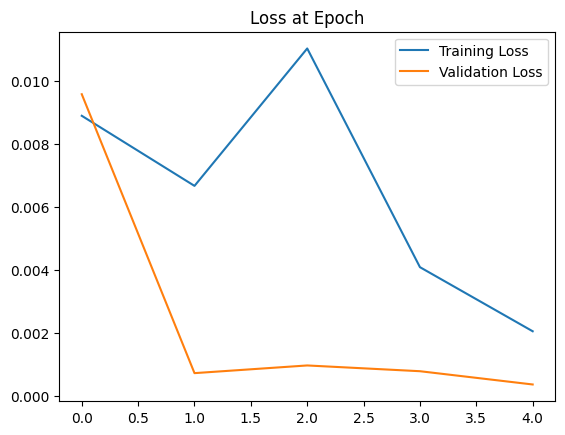

In [41]:
# Graph the loss at epoch
train_losses=[tl.item() for tl in train_losses]
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.title('Loss at Epoch')
plt.legend()

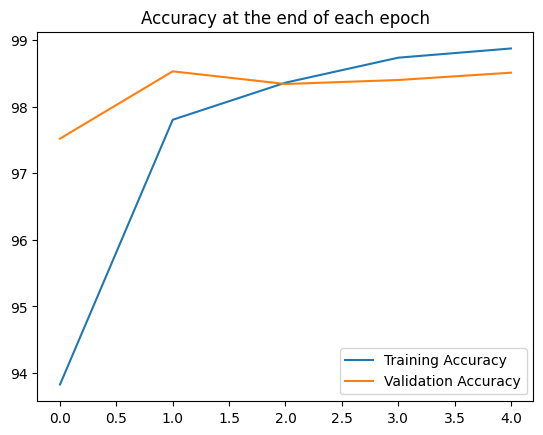

In [42]:
# Graph thr accuracy at the end of each epoch
plt.plot([t/600 for t in train_correct], label='Training Accuracy')
plt.plot([t/100 for t in test_correct], label='Validation Accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend()

In [43]:
test_load_everything = DataLoader(test_data, batch_size=10000, shuffle=False)

In [44]:
with torch.no_grad():
  correct=0
  for X_test, Y_test in test_load_everything:
    Y_val = model(X_test)
    predicted = torch.max(Y_val, 1)[1]
    correct += (predicted == Y_test).sum()

In [46]:
# Test correct
correct.item()/len(test_data)*100

98.50999999999999

In [47]:
# grab an image
test_data[4666] #Tensor with an image in it ..at the end, it shows the label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [48]:
# grab just the data
test_data[4666][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [49]:
# reshape it
test_data[4666][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

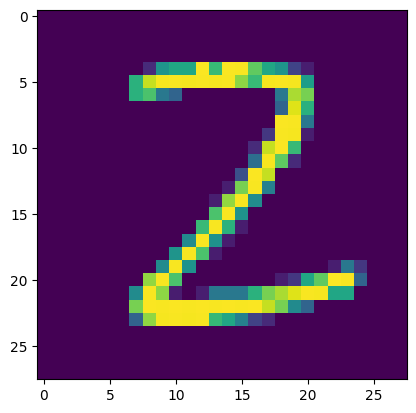

In [50]:
# show the image
plt.imshow(test_data[4666][0].reshape(28,28))

In [53]:
# pass the image thru our model
model.eval()
with torch.no_grad():
  new_prediction = model(test_data[4666][0].view(1,1,28,28)) #1 batch size, 1 color channel,28*28

In [54]:
#check thr new prediction - get probabilities
new_prediction

tensor([[-2.4771e+01, -1.9901e+01, -2.5034e-06, -1.3438e+01, -2.0730e+01,
         -2.9130e+01, -2.6790e+01, -1.3792e+01, -1.7252e+01, -2.3632e+01]])

In [56]:
new_prediction.argmax()

tensor(2)